# B-scan from a Tree Trunk

In [2]:
from gprMax.gprMax import api
filename_g = 'test'
b_scan_cnt = 90


## Create the input file of the healthy tree

In [2]:
%%writefile test.in
#title: Healthy TreeTrunk
#domain: 1.86 0.81 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 20e-9

#material: 5.22 0.005 1 0 Heartwood
#material: 5.9 0.02 1 0 Inner_Sapwood
#material: 6.1 0.033 1 0 Outer_Sapwood
#material: 6.0 1 1 0 Cabdium
#material: 5.8 0 1 0 Bark

add_dispersion_debye: 1 18 9.231e-12 Cabdium
add_dispersion_debye: 1 12.36 9.231e-12 Outer_Sapwood
add_dispersion_debye: 1 9.66 9.231e-12 Inner_Sapwood
add_dispersion_debye: 1 1.43 9.231e-12 Heartwood


#cylinder: 0.93 0.48 0 0.93 0.48 0.002 0.3 Bark
#cylinder: 0.935 0.47 0 0.935 0.47 0.002 0.25 Cabdium
#cylinder: 0.94 0.46 0 0.94 0.46 0.002 0.23 Outer_Sapwood
#cylinder: 0.935 0.46 0 0.935 0.46 0.002 0.18 Inner_Sapwood
#cylinder: 0.93 0.45 0 0.93 0.45 0.002 0.13 Heartwood

#waveform: ricker 1 1e9 my_wave
#hertzian_dipole: z 0.03 0.03 0 my_wave
#rx: 0.13 0.03 0
#src_steps: 0.0189 0 0
#rx_steps: 0.0189 0 0


##material: 1 0 1 0 cavity

##cylinder: 0.9325 0.4625 0 0.9325 0.4625 0.002 0.07 cavity
#geometry_objects_write: 0.03 0.03 0 1.86 0.81 0.002 test



Overwriting test.in


## Plot A-scan


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

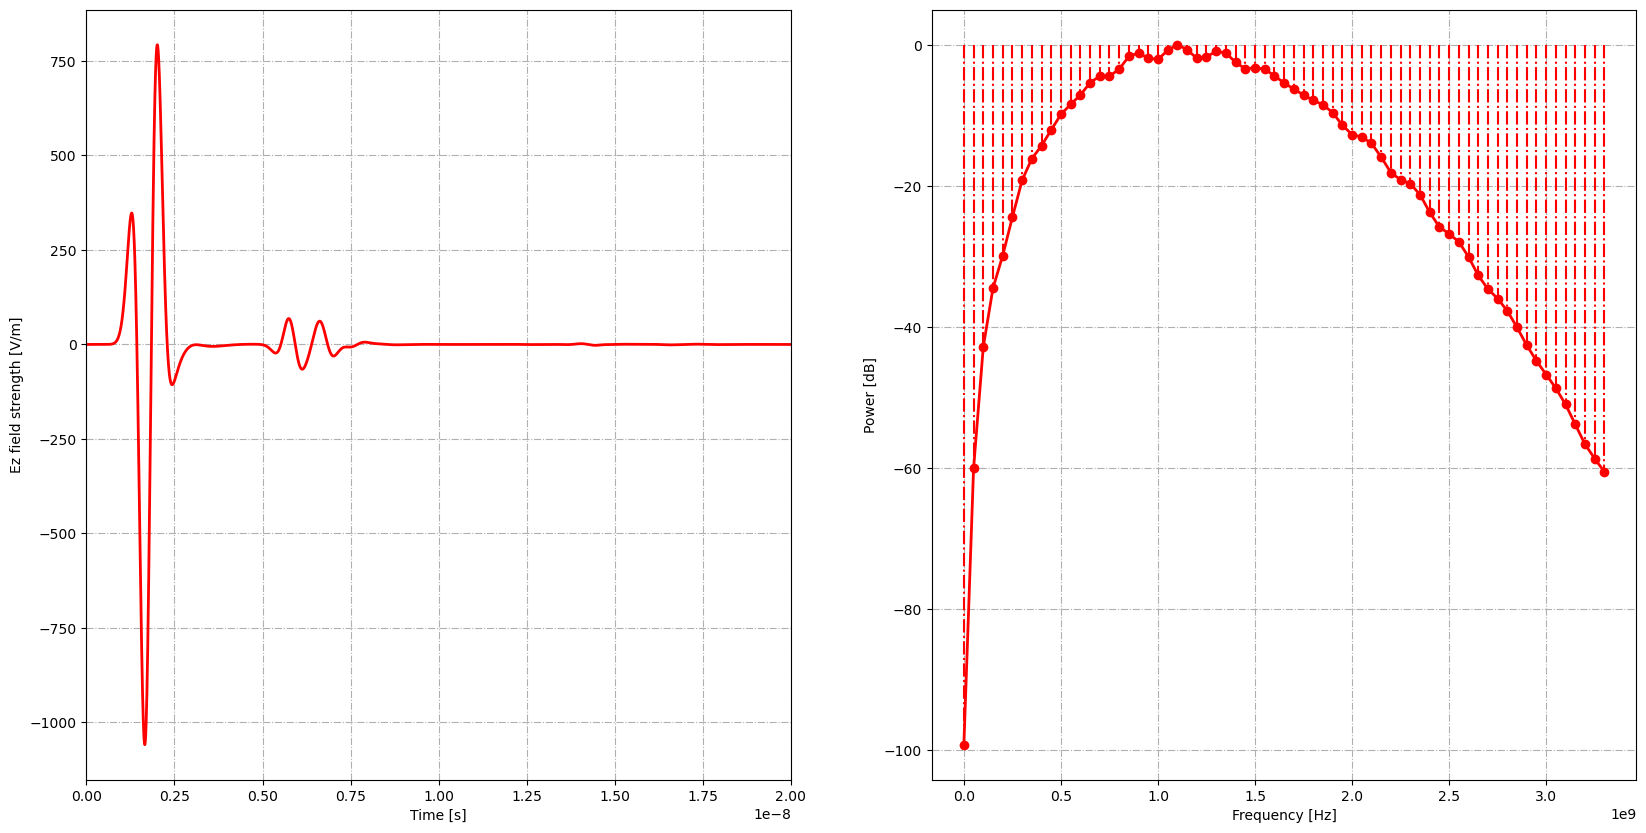

In [3]:
from tools.plot_Ascan import mpl_plot
from gprMax.receivers import Rx
%matplotlib inline

api(filename_g + '.in', n=1, geometry_only=False)

outputs = Rx.defaultoutputs
outputs = ['Ez']
plt = mpl_plot(filename_g + '.out', outputs, fft=True)


## Plot the 2D geometry

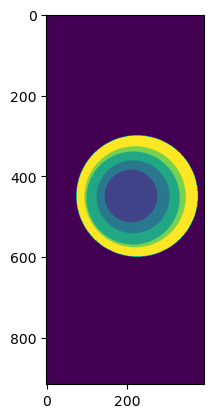

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File(filename_g + '.h5', 'r')
dset = f['data']

# Generate the image
plt.imshow(dset, cmap='viridis')

# Display the image
plt.show()


## B Scan of the healthy tree


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

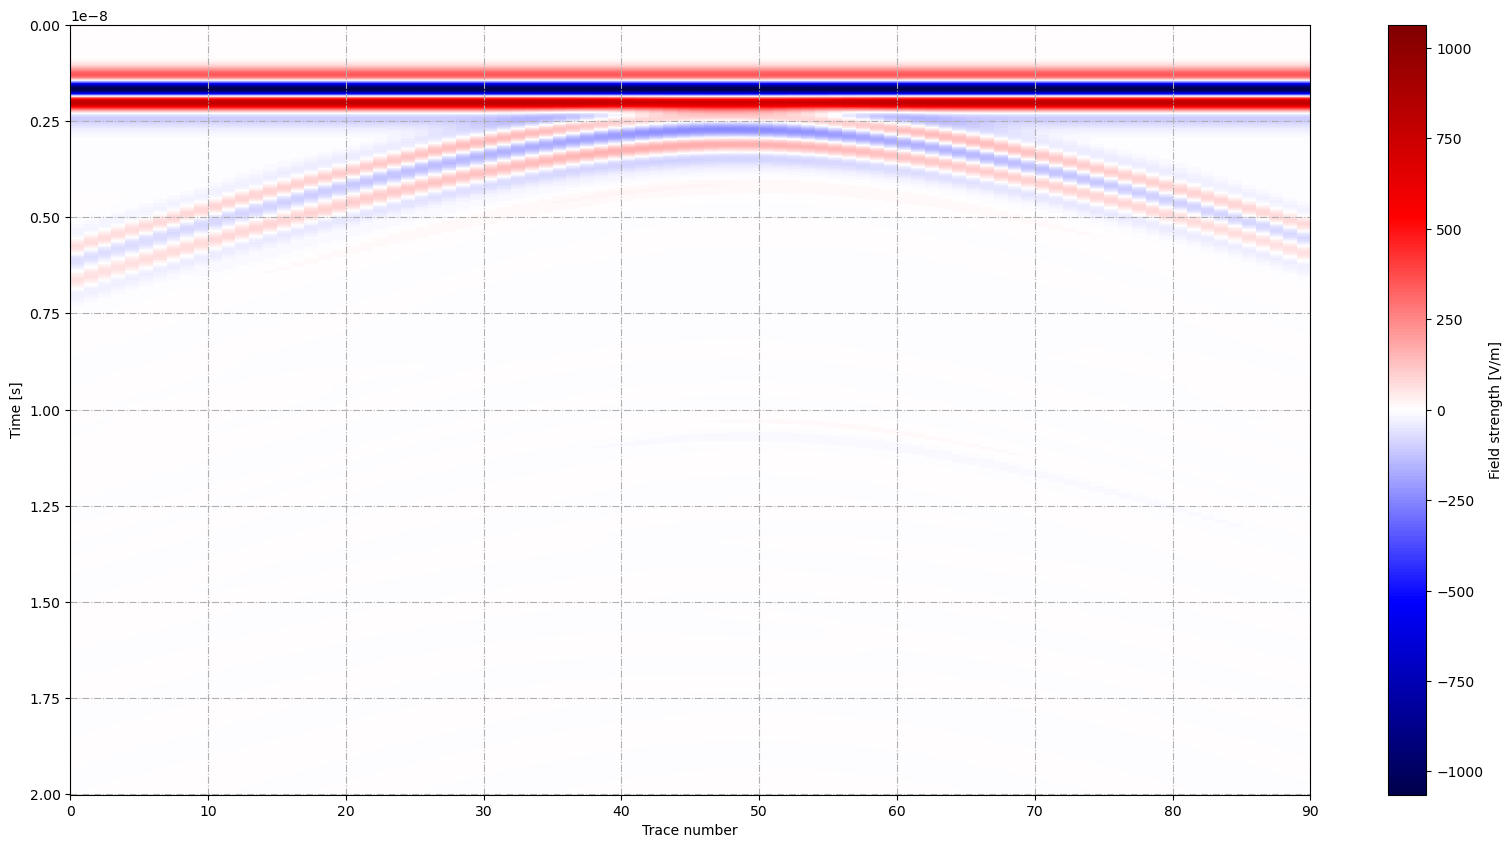

In [3]:
from tools.plot_Bscan import get_output_data, mpl_plot
from tools.outputfiles_merge import merge_files
%matplotlib inline
api(filename_g + '.in', n=b_scan_cnt, geometry_only=False, geometry_fixed=True)

merge_files(filename_g, True)


rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(
    filename_g + '_merged.out', rxnumber, rxcomponent)
plt = mpl_plot(filename_g + '_merged.out',
               outputdata, dt, rxnumber, rxcomponent)


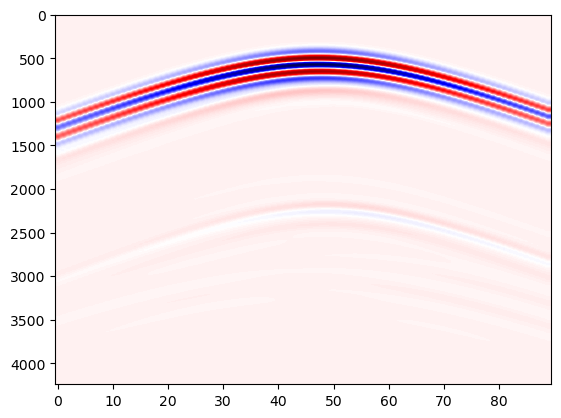

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_names = ['test_merged.out']
Ez_list = []

# Load the data from each file
for file_name in file_names:
    with h5py.File(file_name, 'r') as f:
        Ez = f['rxs']['rx1']['Ez'][()]
        Ez_list.append(Ez)

with h5py.File('source_only.out', 'r') as f0:
    Ez0 = f0['rxs']['rx1']['Ez'][()]

# src = Ez0[:, 0]
src = Ez0[:, np.newaxis]  # Add a new axis

Ez0 = np.repeat(src, b_scan_cnt, axis=1)

# Compute the differences relative to the first file
Ez_diff_list = [np.subtract(Ez, Ez0) for Ez in Ez_list]

Ez = np.concatenate(Ez_diff_list, axis=1)

plt.imshow(Ez, cmap='seismic', aspect='auto')

# Set the desired width and height of the figure
fig_width = 15
fig_height = 15

# Create the figure and axes objects with the desired size and aspect ratio
# fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# plt.show()


## Input file of the tree with cavity

In [4]:
%%writefile test.in
#title: TreeTrunk with cavity
#domain: 1.86 0.81 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 20e-9

#material: 5.22 0.005 1 0 Heartwood
#material: 5.9 0.02 1 0 Inner_Sapwood
#material: 6.1 0.033 1 0 Outer_Sapwood
#material: 6.0 1 1 0 Cabdium
#material: 5.8 0 1 0 Bark

#waveform: ricker 1 1e9 my_wave
#hertzian_dipole: z 0.03 0.03 0 my_wave
#rx: 0.13 0.03 0
#src_steps: 0.0189 0 0
#rx_steps: 0.0189 0 0

#cylinder: 0.93 0.48 0 0.93 0.48 0.002 0.3 Bark
#cylinder: 0.935 0.47 0 0.935 0.47 0.002 0.25 Cabdium
#cylinder: 0.94 0.46 0 0.94 0.46 0.002 0.23 Outer_Sapwood
#cylinder: 0.935 0.46 0 0.935 0.46 0.002 0.18 Inner_Sapwood
#cylinder: 0.93 0.45 0 0.93 0.45 0.002 0.13 Heartwood

#material: 1 0 1 0 cavity

#cylinder: 0.9325 0.4625 0 0.9325 0.4625 0.002 0.07 cavity
#geometry_objects_write: 0.03 0.03 0 1.86 0.81 0.002 test


Overwriting test.in


## Plot A scan


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

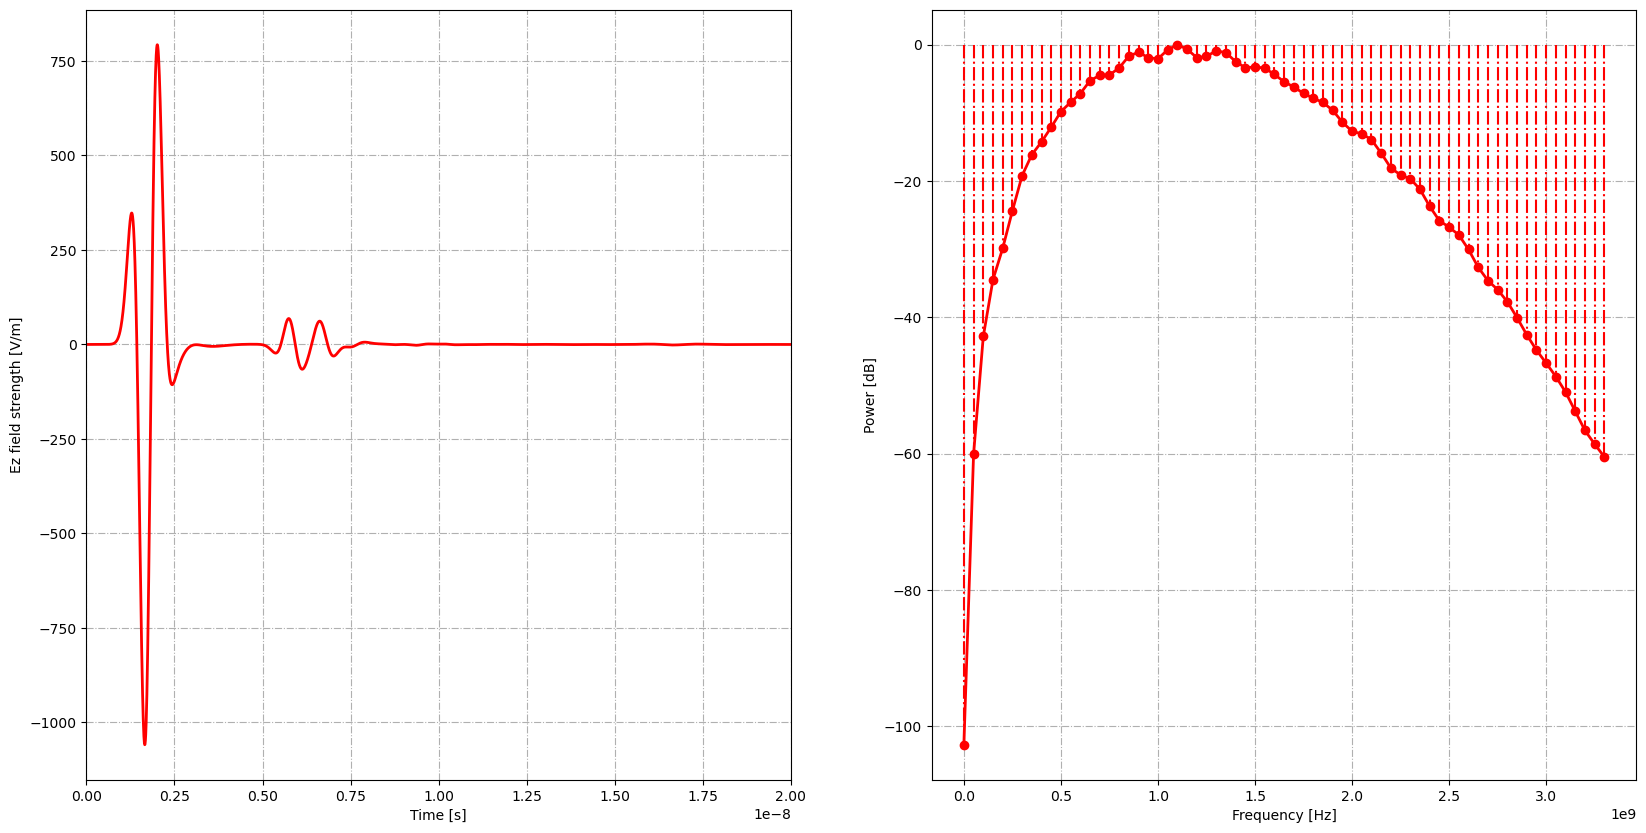

In [3]:
from gprMax.receivers import Rx
from tools.plot_Ascan import mpl_plot

api(filename_g + '.in', n=1, geometry_only=False)

outputs = Rx.defaultoutputs
outputs = ['Ez']
plt = mpl_plot(filename_g + '.out', outputs, fft=True)


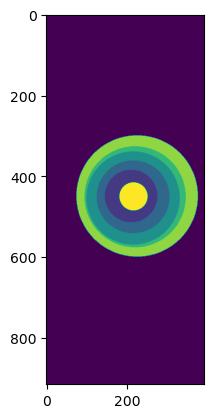

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File(filename_g + '.h5', 'r')
dset = f['data']

# Generate the image
plt.imshow(dset, cmap='viridis')

# Display the image
plt.show()


## Run the model

In [5]:
api(filename_g + '.in', n=b_scan_cnt, geometry_only=False, geometry_fixed=True)



=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

## View the results

### Merge A-scans into B-scan

In [7]:
from tools.outputfiles_merge import merge_files
merge_files(filename_g, False)


### Plot the B-scan

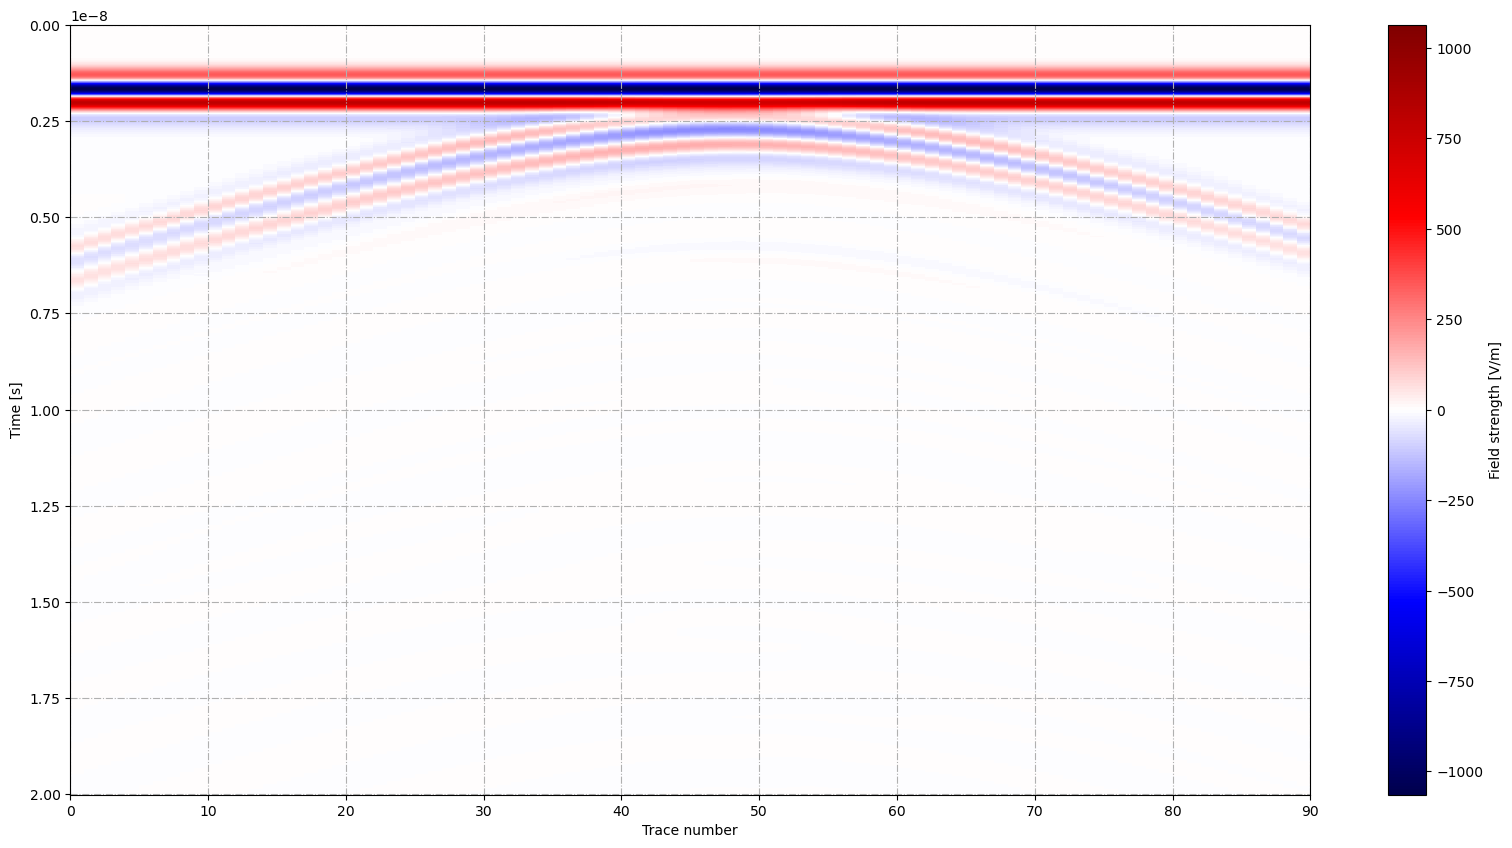

In [8]:
from tools.outputfiles_merge import merge_files
merge_files(filename_g, True)
from tools.plot_Bscan import get_output_data, mpl_plot
%matplotlib inline

rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(
    filename_g + '_merged.out', rxnumber, rxcomponent)
plt = mpl_plot(filename_g + '_merged.out', outputdata, dt, rxnumber, rxcomponent)

# # Change from the default 'seismic' colormap
# plt.set_cmap('gray')


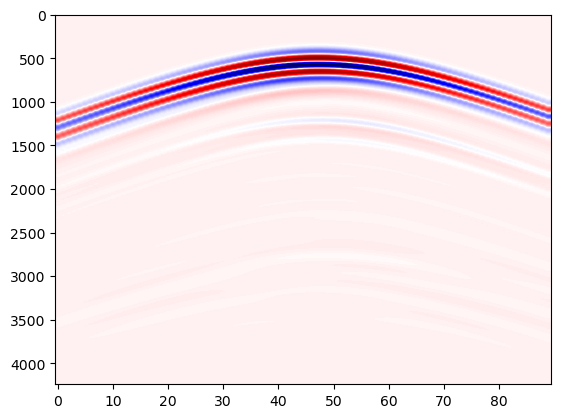

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_names = ['test_merged.out']
Ez_list = []

# Load the data from each file
for file_name in file_names:
    with h5py.File(file_name, 'r') as f:
        Ez = f['rxs']['rx1']['Ez'][()]
        Ez_list.append(Ez)

with h5py.File('source_only.out', 'r') as f0:
    Ez0 = f0['rxs']['rx1']['Ez'][()]

# src = Ez0[:, 0]
src = Ez0[:, np.newaxis]  # Add a new axis

Ez0 = np.repeat(src, b_scan_cnt, axis=1)

# Compute the differences relative to the first file
Ez_diff_list = [np.subtract(Ez, Ez0) for Ez in Ez_list]

Ez = np.concatenate(Ez_diff_list, axis=1)

plt.imshow(Ez, cmap='seismic', aspect='auto')

# Set the desired width and height of the figure
fig_width = 15
fig_height = 15

# Create the figure and axes objects with the desired size and aspect ratio
# fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# plt.show()